# Mini Project - Job Salaries Dataset

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter
import collections

In [2]:
dsdata = pd.read_csv('ds_salaries.csv')
dsdata.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
dsdata.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [4]:
dsdata.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
salary = pd.DataFrame(dsdata['salary_in_usd'])

In [6]:
salary.max()

salary_in_usd    600000
dtype: int64

<AxesSubplot:>

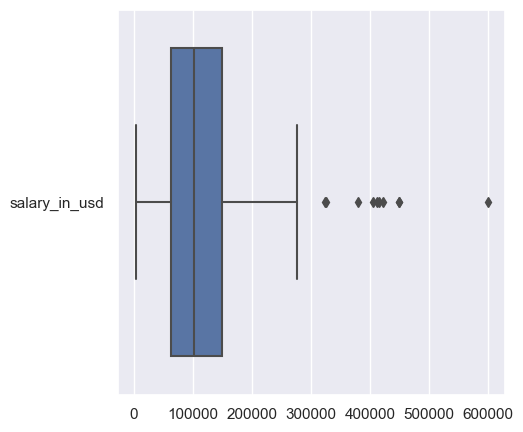

In [10]:
fig = plt.figure(figsize=(5,5))
sb.boxplot(data=salary, orient='h')

In [11]:
salary.describe()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


In [13]:
salary

,salary_in_usd
0,79833
1,260000
2,109024
3,20000
4,150000
...,...
602,154000
603,126000
604,129000
605,150000
